In [1]:
!pip install -r requirements.txt

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pylab
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC

In [3]:
train_path = "train.csv"
train = pd.read_csv(train_path)

test_path = "test.csv"
test = pd.read_csv(test_path)

In [4]:
print('train shape: ', train.shape)
print('test shape: ', test.shape)

train shape:  (167, 14)
test shape:  (72, 14)


In [5]:
train.head()

,Unnamed: 0,DEATH_EVENT,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,29,0,50.0,0,250,0,25,0,262000.0,1.0,136,1,1,120
1,124,0,70.0,0,88,1,35,1,236000.0,1.2,132,0,0,215
2,75,0,65.0,0,118,0,50,0,194000.0,1.1,145,1,1,200
3,82,0,60.0,1,2281,1,40,0,283000.0,1.0,141,0,0,187
4,5,1,68.0,1,220,0,35,1,289000.0,0.9,140,1,1,20


In [6]:
train.describe()

,Unnamed: 0,DEATH_EVENT,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,116.365269,0.329341,61.039922,0.419162,574.586826,0.359281,37.425150,0.365269,262842.241856,1.341198,136.796407,0.640719,0.293413,129.473054
std,69.999429,0.471388,11.965020,0.494906,904.986409,0.481233,11.309132,0.482954,93506.475202,0.945895,3.809530,0.481233,0.456696,79.224693
min,0.000000,0.000000,40.000000,0.000000,23.000000,0.000000,15.000000,0.000000,47000.000000,0.500000,121.000000,0.000000,0.000000,4.000000
25%,53.500000,0.000000,51.000000,0.000000,112.000000,0.000000,30.000000,0.000000,214000.000000,0.900000,134.000000,0.000000,0.000000,65.500000
50%,118.000000,0.000000,60.000000,0.000000,305.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,119.000000
75%,177.500000,1.000000,70.000000,1.000000,582.000000,1.000000,40.000000,1.000000,305000.000000,1.300000,139.500000,1.000000,1.000000,205.500000
max,238.000000,1.000000,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,621000.000000,9.000000,145.000000,1.000000,1.000000,285.000000


In [7]:
soloMorti = train.loc[train['DEATH_EVENT']==1]
soloVivi = train.loc[train['DEATH_EVENT']==0]

Ho descritto soltanto l'analisi di 4 features essendo quelle più rilevanti.
Come per queste ho eseguito gli stessi passi anche per le altre, accorgendomi che il rapporto tra i vari casi di attacchi cardiaci e quindi morte rispetto a tutte le altre features risultava essere circa costante ad 1/3, innalzando così la complessità del modello senza avere però dei risultati veri e propri.

# age
funzione che permette di dividere l'età in gruppi sicuramente un parametro importante in quanto maggiore è l'eta maggiore sarà il rischio di infarto

In [8]:
def fascia_eta(dataSet):
    bins= [0,51,61,71,100]
    labels = [0,1,2,3]
    
    dataSet['age'] = pd.cut(dataSet['age'], bins=bins, labels=labels, right=False)

fascia_eta(train)
fascia_eta(test)

In [9]:
train.groupby(['DEATH_EVENT', 'age'])['DEATH_EVENT'].count()

DEATH_EVENT  age
0            0      32
             1      34
             2      36
             3      10
1            0       9
             1      15
             2      13
             3      18
Name: DEATH_EVENT, dtype: int64

# time
vi è una relazione tra le persone prese in osservazione e gli attacchi cardiaci. In particolare le persone che sono state prese in esame da meno tempo hanno una possibilità maggiore di morire

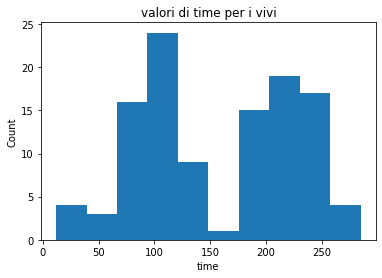

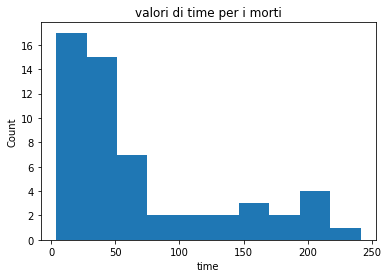

In [10]:
plt.hist(soloVivi['time'])
plt.xlabel('time')
plt.ylabel('Count')
plt.title('valori di time per i vivi')
plt.show()

plt.hist(soloMorti['time'])
plt.xlabel('time')
plt.ylabel('Count')
plt.title('valori di time per i morti')
plt.show()

In [11]:
train['time'] = pd.cut(train.time, bins=4, labels=np.arange(4), right=False)
test['time'] = pd.cut(test.time, bins=4, labels=np.arange(4), right=False)

In [12]:
train.groupby(['DEATH_EVENT', 'time'])['DEATH_EVENT'].count()

DEATH_EVENT  time
0            0       10
             1       39
             2       35
             3       28
1            0       39
             1        6
             2        9
             3        1
Name: DEATH_EVENT, dtype: int64

# serum_creatinine
Ad essere sincero non riesco bene a stimare la relazione che vi è tra creatinina e morte ma facendo un paragone tra i valori creatinina nelle persone vive con quelli dei morti si riesce ad osservare che all'aumentare della creatinina aumenta anche il rischio di morte

In [13]:
train['serum_creatinine'].describe()

count    167.000000
mean       1.341198
std        0.945895
min        0.500000
25%        0.900000
50%        1.100000
75%        1.300000
max        9.000000
Name: serum_creatinine, dtype: float64

In [14]:
# funzione che permette di dividere i valori della creatinina in gruppi
def group_serum_creatinine(dataSet):
    bins= [0,0.5,1,1.5,10]
    labels = [0,1,2,3]
    
    dataSet['serum_creatinine'] = pd.cut(dataSet['serum_creatinine'], bins=bins, labels=labels, right=False)
    
group_serum_creatinine(train)
group_serum_creatinine(test)

In [15]:
train.groupby(['DEATH_EVENT', 'serum_creatinine'])['DEATH_EVENT'].count()

DEATH_EVENT  serum_creatinine
0            0                    0
             1                   43
             2                   57
             3                   12
1            0                    0
             1                    5
             2                   25
             3                   25
Name: DEATH_EVENT, dtype: int64

# ejection_fraction
Le persone che hanno una minore perchentuale di sangue ch esce dal cuore ad ogni contrazione hanno una probabilità maggiore di avere un attacco cardiaco e quindi una maggiore possibilità di morire

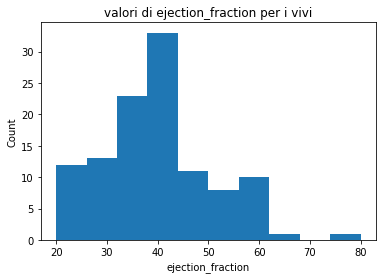

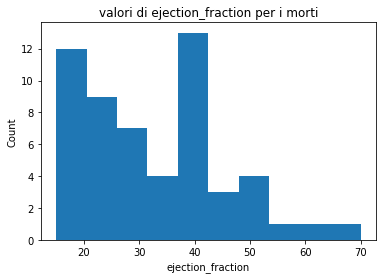

In [16]:
plt.hist(soloVivi['ejection_fraction'])
plt.xlabel('ejection_fraction')
plt.ylabel('Count')
plt.title('valori di ejection_fraction per i vivi')
plt.show()

plt.hist(soloMorti['ejection_fraction'])
plt.xlabel('ejection_fraction')
plt.ylabel('Count')
plt.title('valori di ejection_fraction per i morti')
plt.show()

In [17]:
train['ejection_fraction'] = pd.cut(train.ejection_fraction, bins=3, labels=np.arange(3), right=False)
test['ejection_fraction'] = pd.cut(test.ejection_fraction, bins=3, labels=np.arange(3), right=False)

In [18]:
train_X = train.drop('DEATH_EVENT', axis=1)
train_y = train['DEATH_EVENT']

test_X = test.drop('DEATH_EVENT', axis=1)
test_y = test['DEATH_EVENT']

# DecisionTreeClassifier

In [19]:
col = ['serum_creatinine', 'age', 'ejection_fraction', 'time']

Ho scelto di utilizzare solo 4 features essendo quelle che mi davano un rapporto maggiore tra morte e features o gruppo interno alla feature e con il quale avrei potuto ottenere prestazioni migliori.
Le altre features non sembravano influenzare positivamente il modello, anzi aggiungendo features diverse da quelle sopra elencate il test test diminuiva e con esso anche il numero di predizioni di etichette 1 ("morto").

Ho cercato di concentrarmi soltanto sulla predizione dell'etichetta 1 (morte) anche se risulta ostico a causa di una concentrazione dei dati verso la laber 0 (vivi) e nella maggior parte delle volte ciò che andava a fare il mio modello era stimare gli 0. Nonostante alcuni modelli avessero training set / test set che sembravano risultare migliori in realtà la previsione della label 1 peggiorava.

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

model = DecisionTreeClassifier(random_state=42, max_leaf_nodes=8, criterion='entropy')

# Fit Model
model.fit(train_X[col], train_y)

val_predictions = model.predict(test_X[col])

print("Accuracy on training set: {:.3f}".format(model.score(train_X[col], train_y)))
print("Accuracy on test set: {:.3f}".format(model.score(test_X[col], test_y)))

Accuracy on training set: 0.886
Accuracy on test set: 0.819


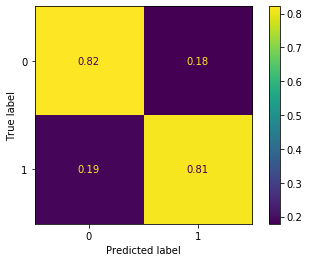

In [21]:
plot_confusion_matrix(model, test_X[col], test_y, normalize = 'true')  # doctest: +SKIP
plt.show()

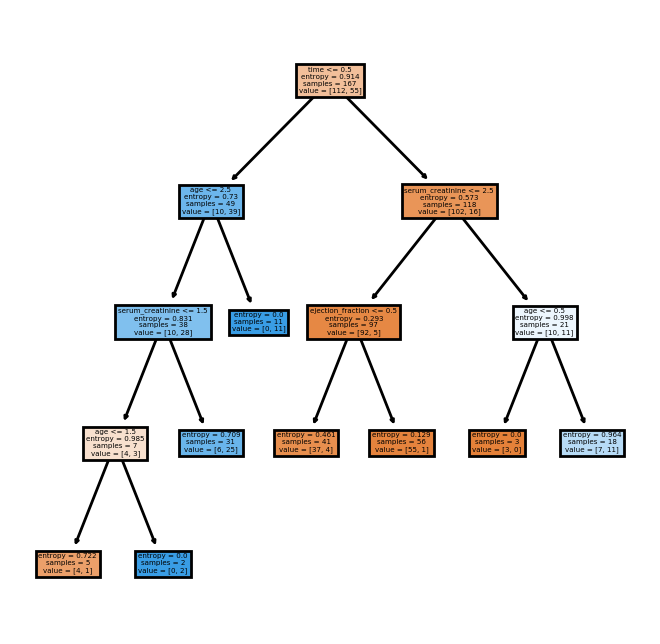

In [22]:
from sklearn import tree
from sklearn.tree import plot_tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=200)

tree.plot_tree(model,
               feature_names = col,
               filled = True);